<a href="https://colab.research.google.com/github/javedbaig/Good_Reads/blob/main/Good_reads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [ ]:
test_case = pd.read_csv('/content/my_goodreads_test.csv', encoding='utf-8',engine='python')

In [ ]:
df = pd.read_csv('/content/my_goodreads_train.csv', encoding='utf-8', engine='python', quoting=csv.QUOTE_NONE)

In [ ]:
df.shape

In [ ]:
import os
import random
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import text
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM, Dropout, Bidirectional, Conv1D, MaxPooling1D
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
test_case.tail()

,",user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments"
843293,The person I do feel most sorry for is Go. She...
843294,"Overall, I still think this is a book, if one ..."
843295,"868869,1e89e6cc6a7c3924c8899957021861b39,11069..."
843296,"651403,1a694003933611f14bef5b88383907b88,16024..."
843297,"742558,1c169ccef89607b6d19571e2b65447f83,19383..."


we dont have ratings column in test data

In [ ]:
df.head()

,,,,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
1da3dcc13cf360b9ecb06251e86237535,182091851,1c949b5dedf860514ec8b97ad158c9f4f,5,"""I thought this was a very good historical fan...",the plot is more character-based,focusing,with a small cast of supporting characters,on the two characters of a golem and a jinni....,Fri Feb 01 16:44:16 -0800 2013,Tue Oct 25 18:49:25 -0700 2016,Sat May 04 00:00:00 -0700 2013,Thu Apr 25 00:00:00 -0700 2013,5,6
1ae436441b6153473ef907aed1006a159,1451461,112ee86a20d7e4308c0a054f8b03128cd,5,"""I've had this book recommended to me more tha...",so I decided to give it a shot. Turns out,it was pretty damn good,although it was suuuuuuuper fucking Catholic ...,Sun Nov 08 12:10:16 -0800 2015,Sun Nov 08 12:24:59 -0800 2015,Tue May 05 00:00:00 -0700 2015,Sun May 03 00:00:00 -0700 2015,0,0,None
1aa5e9d859b0c0737f4b99a07edf19c88,13483572,1253729b67f301b75a0f26e85f6d6fb31,5,"""Seriously! You go and throw that twist into t...",happens... Everything is just convulated and ...,Wed Oct 10 02:07:19 -0700 2012,Sat Apr 27 00:40:19 -0700 2013,Sat Apr 27 00:40:19 -0700 2013,Thu Apr 25 00:00:00 -0700 2013,0,0,None,None,None
1940c22aba67c3d49ccd37891c52c9f51,131585171,1ae0005e94dce0dc5c18d6ae2b4a329ab,4,"""Gosh!!! I'm still not recovering from the eff...",None,None,None,None,None,None,None,None,None,None
This book was WAY BETTER than the first one!!!,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
test_case.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,116230.0,4.484975e+05,2.598592e+05,7.0,223292.0,447524.0,673778.5,899995.0
book_id,116230.0,9.607208e+07,7.256439e+07,11.0,13487397.0,119513323.0,160159892.0,199998081.0
n_votes,116230.0,3.177493e+00,1.533816e+01,-3.0,0.0,0.0,2.0,1156.0
n_comments,116230.0,1.013121e+00,6.848858e+00,-1.0,0.0,0.0,0.0,1335.0


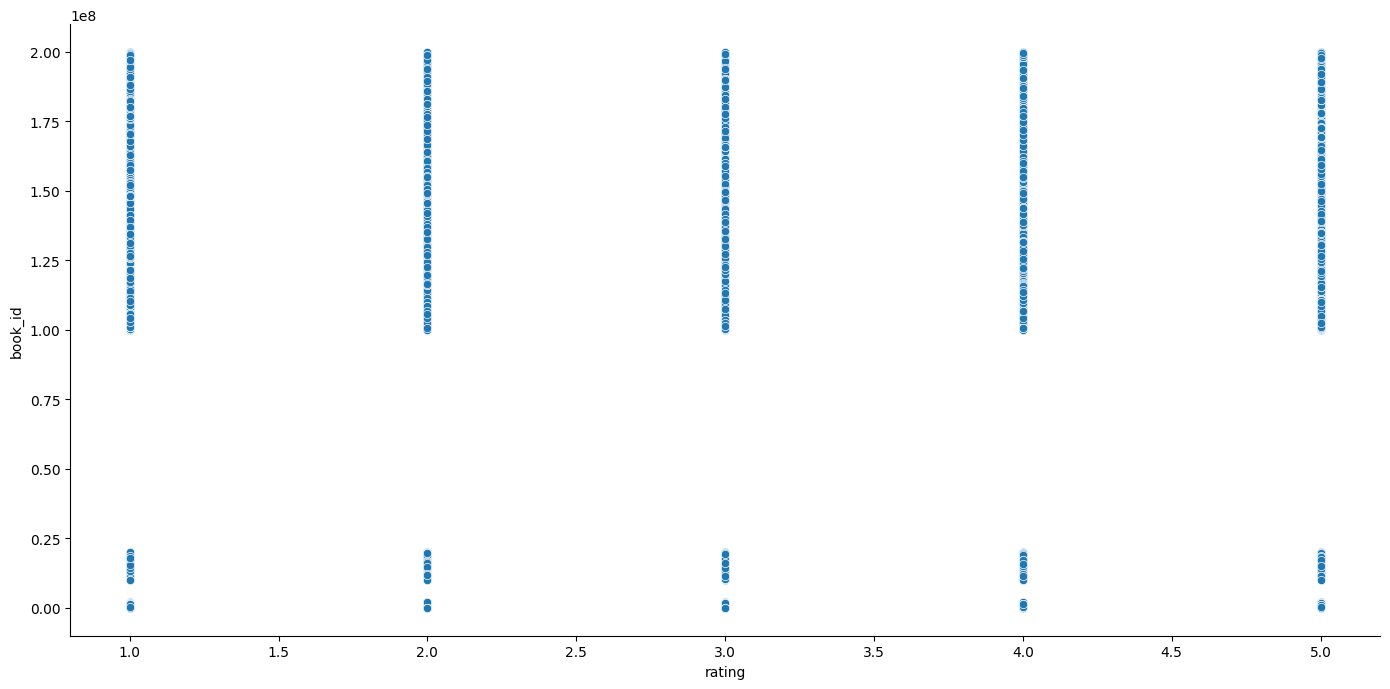

In [ ]:
sns.relplot(x="rating", y="book_id", data=df, height=7, aspect = 2)

In [ ]:
df = df[["review_id", "rating", "review_text"]]

In [ ]:
df = df.dropna()

In [ ]:
df["split"] = df.apply(lambda x: "train" if random.randrange(0,100) > 10 else "valid", axis=1)

In [ ]:
df["split"].value_counts()

train    107431
valid     13187
Name: split, dtype: int64

In [ ]:
df_train = df[df["split"] == "train"]
df_val = df[df["split"] == "valid"]

In [ ]:
df_train.head()

,review_id,rating,review_text,split
0,1c949b5dedf860514ec8b97ad158c9f4f,5,I thought this was a very good historical fant...,train
1,112ee86a20d7e4308c0a054f8b03128cd,5,I've had this book recommended to me more than...,train
2,1253729b67f301b75a0f26e85f6d6fb31,5,Seriously! You go and throw that twist into th...,train
3,1ae0005e94dce0dc5c18d6ae2b4a329ab,4,Gosh!!! I'm still not recovering from the effi...,train
4,1d8357d2abdcc656635c5459c1feec761,3,"3.5 stars rounded down. I can't help it, I jus...",train


In [ ]:
df_val.head()

,review_id,rating,review_text,split
7,1e8560b7e97bbf63936113938b7ffc4ac,5,This was such an unexpected read for me. I nev...,valid
10,1ff45f071d8d226e4a5d253107c1ec778,3,Really engaging and exciting endings. So much ...,valid
30,167af6483e65910912a706ffebb588416,5,Stories based on some of my favorite character...,valid
37,124bf244f4e4445086d02247da8acb402,3,** spoiler alert ** \n I wanted to give this b...,valid
40,1ab0e8d93caeef0740fd3c10f7b9037a8,5,5 STARS! \n This series seriously just has the...,valid


First, an instance of the Tokenizer class is created and initialized with a special out-of-vocabulary (oov) token, represented by the string "'oov'". This token will be used to replace any words that are not found in the tokenizer's vocabulary during text encoding.

Next, the fit_on_texts() method of the Tokenizer class is called, with the input being the 'Review' column of the 'df_train' DataFrame. This method updates the tokenizer's internal vocabulary based on the input text, assigning a unique integer index to each word in the text. The vocabulary is constructed by tokenizing the text, i.e., splitting it into individual words, and then counting the frequency of each unique word.

Overall, the purpose of the code is to preprocess text data in preparation for use in a machine learning model. Specifically, the Tokenizer is used to convert the text data into a numerical representation that can be fed into a neural network. The oov token ensures that any previously unseen words are not completely ignored during the encoding process.

In [ ]:
tokenizer=Tokenizer(oov_token="'oov'")
tokenizer.fit_on_texts(df_train['review_text'])

In [ ]:
maxlen = 300
train_X = pad_sequences(tokenizer.texts_to_sequences(df_train['review_text']), maxlen=maxlen)
val_X = pad_sequences(tokenizer.texts_to_sequences(df_val['review_text']), maxlen=maxlen)

In [ ]:
df_train["rating"].isnull().sum()

0

In [ ]:
df_val["rating"].isnull().sum()

0

In [ ]:
train_Y = df_train["rating"]
val_Y = df_val["rating"]
train_Y_cat = to_categorical(df_train["rating"]-1, num_classes=5)
val_Y_cat = to_categorical(df_val["rating"]-1, num_classes=5)

In [ ]:


embedding_index = {}
f = open('/content/glove.6B.100d.txt',encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embedding_index[word] = coefs
f.close()
print('Found %s word vectors ' % len(embedding_index))

Found 190883 word vectors 


In [ ]:
max_words = len(tokenizer.word_index) + 1
embedding_dim = 100
embedding_matrix = np.zeros((max_words,embedding_dim))

for word, idx in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[idx]=embedding_vector

In [ ]:
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.41800001  0.24968    -0.41242    ... -0.18411    -0.11514
  -0.78580999]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.62581003 -1.34350002  0.11425    ...  0.29356    -0.82802999
   0.12331   ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [ ]:
model=Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="linear"))
model.compile(optimizer="Adam", loss='mean_squared_error', metrics=['mse'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          12772500  
                                                                 
 bidirectional (Bidirectiona  (None, 64)               34048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,807,605
Trainable params: 35,105
Non-trainable params: 12,772,500
_________________________________________________________________
None


In [ ]:
model.fit(train_X, train_Y, epochs=20, batch_size=256, validation_data=(val_X, val_Y))

Epoch 1/20
420/420 [==============================] - 21s 27ms/step - loss: 1.7163 - mse: 1.7163 - val_loss: 1.2595 - val_mse: 1.2595
Epoch 2/20
420/420 [==============================] - 10s 23ms/step - loss: 1.0918 - mse: 1.0918 - val_loss: 1.0224 - val_mse: 1.0224
Epoch 3/20
420/420 [==============================] - 10s 24ms/step - loss: 0.9973 - mse: 0.9973 - val_loss: 0.9673 - val_mse: 0.9673
Epoch 4/20
420/420 [==============================] - 11s 26ms/step - loss: 0.9443 - mse: 0.9443 - val_loss: 0.9296 - val_mse: 0.9296
Epoch 5/20
420/420 [==============================] - 10s 24ms/step - loss: 0.9135 - mse: 0.9135 - val_loss: 0.9190 - val_mse: 0.9190
Epoch 6/20
420/420 [==============================] - 10s 24ms/step - loss: 0.8931 - mse: 0.8931 - val_loss: 0.8969 - val_mse: 0.8969
Epoch 7/20
420/420 [==============================] - 10s 25ms/step - loss: 0.8743 - mse: 0.8743 - val_loss: 0.8861 - val_mse: 0.8861
Epoch 8/20
420/420 [==============================] - 10s 23ms

In [ ]:
pred = model.predict(val_X)

413/413 [==============================] - 4s 9ms/step


In [ ]:
pred_hard = np.array([round(p[0]) for p in pred])

In [ ]:
pred_hard[pred_hard < 1] = 1
pred_hard[pred_hard > 5] = 5

In [ ]:
np.unique(pred_hard)

array([1, 2, 3, 4, 5])

In [ ]:
accuracy_score(val_Y, pred_hard)

0.4725866383559566

In [ ]:
print(val_X)

[[     0      0      0 ...     14 202338    977]
 [     0      0      0 ...     12    353  11407]
 [     0      0      0 ...      6    927    347]
 ...
 [     0      0      0 ...      9     34     35]
 [     0      0      0 ...    280   6402  25015]
 [     0      0      0 ...  24575      3  16972]]


In [ ]:
final_pred = pad_sequences(tokenizer.texts_to_sequences(test_case['review_text']), maxlen=maxlen)

In [ ]:
predictions = model.predict(final_pred)

3633/3633 [==============================] - 28s 8ms/step


In [ ]:
len(predictions)

116230

In [ ]:
len(test_case['review_id'])

200000

In [ ]:
print(test_case['review_id'])

0         16c32b9bb0142734c60f8b028f281c5dd
1         1f86ec340856f1097c922d33aed48d4ea
2         14a20b34f27611e45bd75e24de6a06324
3         1b2e5b069e4f440d152ae6d48e3f111ac
4         132aec4dfb13a2f8032a7431023dd728f
                        ...                
199995    1e65b0ab60fb0fc5361da7c3a7a45bc2a
199996    176c31b9581191138cc477b0df2f82b09
199997    17af2bb1902e2b7f6a5004e7bbe285139
199998    1e13fa3ce7e49dfd190bd0a02c36efe61
199999    15f7e3747bb4b66f81c14a42a8d6e2403
Name: review_id, Length: 200000, dtype: object


In [ ]:
print(predictions.T)

[3 4 4 ... 3 3 3]


In [ ]:
test_case['review_id'].shape

(200000,)

In [ ]:
predictions.shape

(200000,)

In [ ]:
predictions = np.squeeze(predictions)


In [ ]:
predictions = predictions.astype(int)

In [ ]:
# Add 'Id' column to the predictions dataframe
predictions_df = pd.DataFrame({'review_id': test_case['review_id'], 'rating':predictions})

# Write the dataframe to a CSV file
predictions_df.to_csv("1st_try.csv", index=False)

In [ ]:
ab = pd.read_csv('/content/1st_try.csv')

In [ ]:
ab.tail()

,review_id,rating
199995,1e65b0ab60fb0fc5361da7c3a7a45bc2a,4
199996,176c31b9581191138cc477b0df2f82b09,4
199997,17af2bb1902e2b7f6a5004e7bbe285139,4
199998,1e13fa3ce7e49dfd190bd0a02c36efe61,4
199999,15f7e3747bb4b66f81c14a42a8d6e2403,3


In [ ]:
ab['rating'] = ab['rating'].round()

In [ ]:
ab['rating'] = ab['rating'].astype(int)

In [ ]:
ab.to_csv("ab.csv", index=False)